In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Clean_data_Dec1.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

,Set,zipcode,price_sold,zestimate,bedroom,bathroom,area,year,parking,lot,...,heating_central_air_dummy,heating_gas_connected_dummy,cooling_central_air_dummy,cooling_ductless_dummy,cooling_window_units_dummy,cooling_wall_units_dummy,cooling_other_dummy,cooling_none_dummy,bedroom_6_plus,bathroom_6_plus
0,A,1075,320000.0,326100.0,3,2,1060.0,1963,4.0,0.22,...,0,0,1,0,0,0,0,0,0,0
1,A,1075,338000.0,334600.0,3,1,1239.0,1950,1.0,0.25,...,0,0,1,0,0,0,0,0,0,0
2,A,1075,400000.0,400400.0,4,2,1482.0,1955,4.0,0.32,...,0,0,0,0,1,0,0,0,0,0
3,A,1075,396900.0,400500.0,3,2,1440.0,2000,2.0,0.57,...,1,0,1,0,0,0,0,0,0,0
4,A,1075,615000.0,625800.0,4,3,2516.0,1987,2.0,0.57,...,0,0,0,0,1,0,0,0,0,0


## Initial Observations:
**Dataset Structure:** The dataset contains 34 columns, with details such as `price_sold`, `zestimate`, `bedroom`, `bathroom`, `area`, `year`, and several dummy variables for heating and cooling features.

**Columns of Interest:**
- **Set:** Identifies the filtered_data (A, B, or C).
- **zipcode:** Indicates the location.
- **price_sold:** The target variable for regression tasks.
- Dummy variables suggest categorical feature encoding.

## Next Steps:
1. **Filter data for:**
   - Subset Set == 'A'.
   - ZIP codes: 02906 and 15106.

2. **Perform Exploratory Data Analysis (EDA):**
   - Summary statistics for numerical features.
   - Visualizations to explore relationships and distributions.
   - Create derived variables like `HouseAge` and check feature correlations.

3. **Begin regression modeling** for `price_sold` and **classification modeling** for the likelihood of sale.

In [2]:
# Filter data for Set 'A' and the specified ZIP codes
filtered_data = data[(data['Set'] == 'A') & (data['zipcode'].isin([2906, 15106]))].copy()

# Add derived variable: HouseAge
from datetime import datetime

current_year = datetime.now().year
filtered_data['HouseAge'] = current_year - filtered_data['year']

# Display the filtered data structure
filtered_data.head()

,Set,zipcode,price_sold,zestimate,bedroom,bathroom,area,year,parking,lot,...,heating_gas_connected_dummy,cooling_central_air_dummy,cooling_ductless_dummy,cooling_window_units_dummy,cooling_wall_units_dummy,cooling_other_dummy,cooling_none_dummy,bedroom_6_plus,bathroom_6_plus,HouseAge
155,A,2906,525000.0,527000.0,2,1,1015.0,1938,2.0,0.02,...,0,1,0,0,0,0,0,0,0,86
156,A,2906,402000.0,438300.0,2,1,1319.0,1900,2.0,0.03,...,0,0,0,0,0,0,0,0,0,124
157,A,2906,750000.0,755100.0,4,2,1711.0,1920,4.0,0.04,...,0,0,0,0,0,0,0,0,0,104
158,A,2906,665000.0,675400.0,3,2,1760.0,1910,2.0,0.04,...,0,1,0,0,0,0,0,0,0,114
159,A,2906,885000.0,885200.0,3,4,1840.0,1824,0.0,0.04,...,0,0,0,0,0,0,0,0,0,200


## Observations After Filtering:
- The dataset has been successfully filtered for Set A and ZIP codes 02906 and 15106.
- A new feature, `HouseAge`, has been added, derived from the current year minus the year the house was built.

---

## Next Steps:
### EDA:
- Visualize the distribution of house prices and relationships with key features like `HouseAge`, `area`, and `bedrooms`.
- Identify any anomalies or outliers.

### Feature Engineering:
- Explore interaction terms or derived features like price-to-area ratio.

### Regression Modeling:
- Prepare the dataset for regression analysis, focusing on `price_sold` as the target.
- Evaluate models (Linear Regression and LASSO).


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

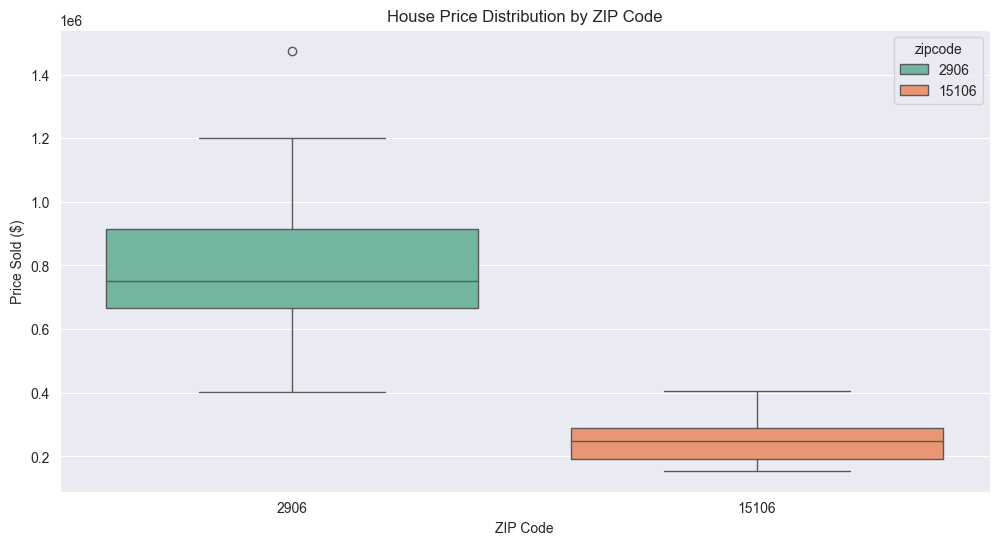

In [4]:
# Visualize price distribution by ZIP code
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='zipcode', y='price_sold',hue='zipcode', palette='Set2')
plt.title('House Price Distribution by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Price Sold ($)')
plt.show()

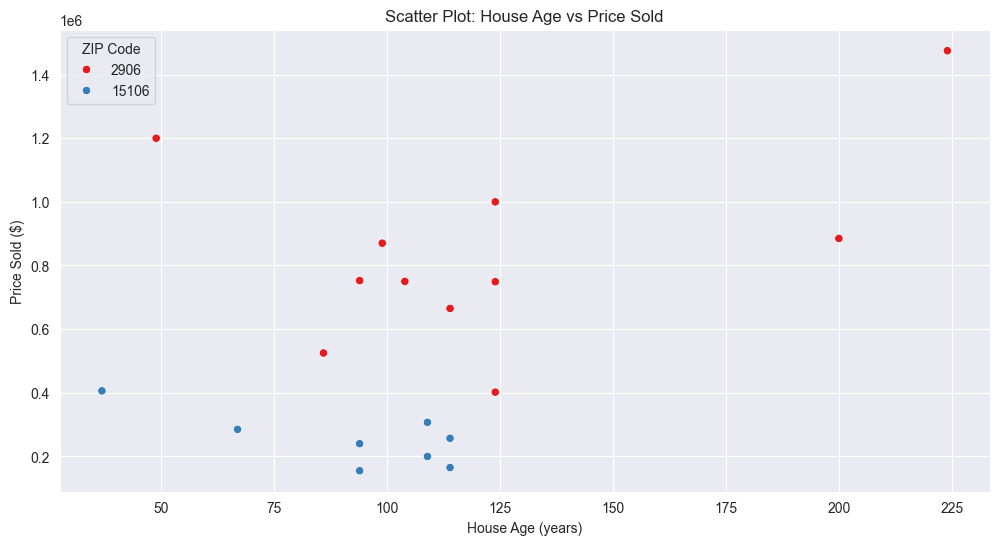

In [5]:
# Visualize relationship: House Age vs. Price Sold
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='HouseAge', y='price_sold', hue='zipcode', palette='Set1')
plt.title('Scatter Plot: House Age vs Price Sold')
plt.xlabel('House Age (years)')
plt.ylabel('Price Sold ($)')
plt.legend(title='ZIP Code')
plt.show()

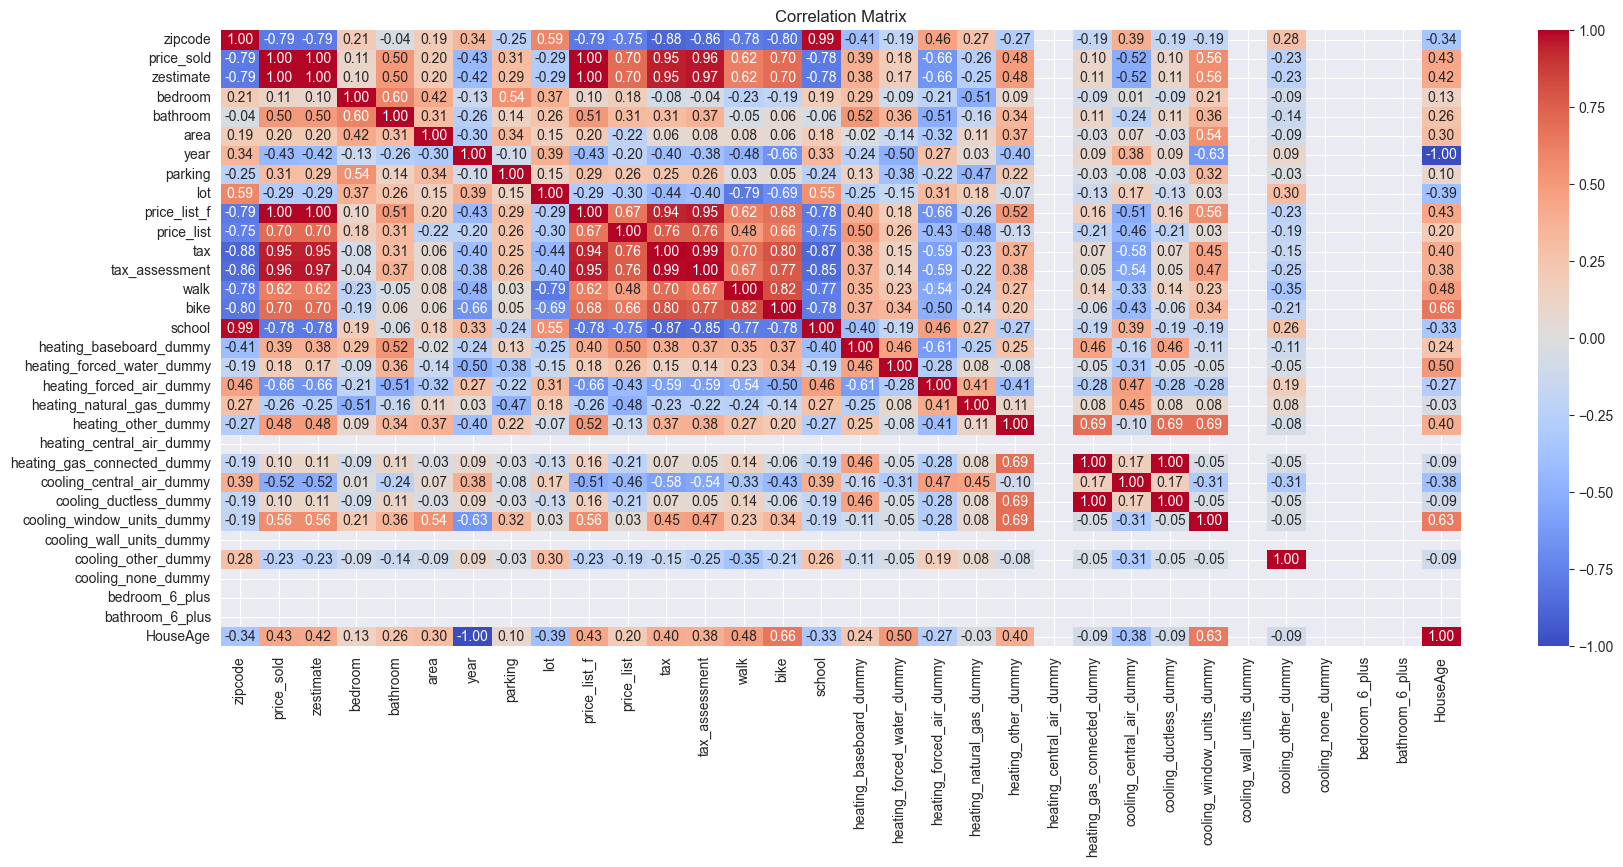

In [6]:
# Correlation heatmap
numeric_cols = filtered_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
filtered_data.describe()

,zipcode,price_sold,zestimate,bedroom,bathroom,area,year,parking,lot,price_list_f,...,heating_gas_connected_dummy,cooling_central_air_dummy,cooling_ductless_dummy,cooling_window_units_dummy,cooling_wall_units_dummy,cooling_other_dummy,cooling_none_dummy,bedroom_6_plus,bathroom_6_plus,HouseAge
count,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,...,20.000000,20.00000,20.000000,20.000000,20.0,20.000000,20.0,20.0,20.0,20.000000
mean,7786.000000,5.976800e+05,6.081000e+05,3.300000,2.550000,2476.450000,1914.300000,2.150000,0.100000,5.981400e+05,...,0.050000,0.65000,0.050000,0.050000,0.0,0.050000,0.0,0.0,0.0,109.700000
std,6132.021217,3.683731e+05,3.773626e+05,0.801315,0.944513,1040.875465,42.394265,1.348488,0.093752,3.687569e+05,...,0.223607,0.48936,0.223607,0.223607,0.0,0.223607,0.0,0.0,0.0,42.394265
min,2906.000000,1.550000e+05,1.563000e+05,2.000000,1.000000,1015.000000,1800.000000,0.000000,0.020000,1.500000e+05,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,37.000000
25%,2906.000000,2.780000e+05,2.801750e+05,3.000000,2.000000,1760.000000,1907.500000,1.750000,0.047500,2.780000e+05,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,94.000000
50%,2906.000000,5.950000e+05,6.012000e+05,3.000000,2.000000,2305.000000,1915.000000,2.000000,0.070000,5.824500e+05,...,0.000000,1.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,109.000000
75%,15106.000000,7.819250e+05,8.044500e+05,4.000000,3.000000,2678.250000,1930.000000,3.250000,0.102500,8.115000e+05,...,0.000000,1.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,116.500000
max,15106.000000,1.475000e+06,1.504900e+06,5.000000,4.000000,4881.000000,1987.000000,4.000000,0.420000,1.475000e+06,...,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,224.000000


In [8]:
# Note: Highly correlated features such as 'zestimate', 'tax_assessment' will not be used in feature engineering

# Feature Engineering
filtered_data['PriceToAreaRatio'] = filtered_data['price_sold'] / (filtered_data['area'] + 1e-9)
filtered_data['TaxToPriceRatio'] = filtered_data['tax'] / (filtered_data['price_sold'] + 1e-9)
filtered_data['RoomsPerBedroom'] = (filtered_data['bathroom'] + filtered_data['bedroom']) / (filtered_data['bedroom'] + 1e-9)
filtered_data['TaxLotInteraction'] = filtered_data['tax'] * filtered_data['lot']


# Select features for regression
selected_features = [
    'price_sold',
    'bedroom',
    'tax',
    'parking',
    # 'lot',
    # 'bike',
    # 'walk',
    'HouseAge',
    'PriceToAreaRatio',
    'TaxToPriceRatio',
    'RoomsPerBedroom',
    'TaxLotInteraction',
]
# Drop rows with missing or invalid values
regression_data = filtered_data[selected_features]
regression_data.head()

,price_sold,bedroom,tax,parking,HouseAge,PriceToAreaRatio,TaxToPriceRatio,RoomsPerBedroom,TaxLotInteraction
155,525000.0,2,7209.0,2.0,86,517.241379,0.013731,1.500000,144.18
156,402000.0,2,9163.0,2.0,124,304.776346,0.022794,1.500000,274.89
157,750000.0,4,7791.0,4.0,104,438.340152,0.010388,1.500000,311.64
158,665000.0,3,8888.0,2.0,114,377.840909,0.013365,1.666667,355.52
159,885000.0,3,10433.0,0.0,200,480.978261,0.011789,2.333333,417.32


In [9]:
# Prepare target and predictors
X_reg = regression_data.drop(columns=['price_sold'])
y_reg = regression_data['price_sold']

In [10]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# K-Fold Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Models with hyperparameter tuning for LASSO
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(max_iter=1500, random_state=42), param_grid, scoring='neg_mean_squared_error', cv=kf)

# Train and Evaluate Models
results = []
n, p = X_reg.shape

for name, model in {"Linear Regression": LinearRegression(), "LASSO Regression": lasso_grid}.items():
    mae_scores, rmse_scores, adj_r2_scores = [], [], []

    for train_index, test_index in kf.split(X_reg):
        X_train, X_test = X_reg.iloc[train_index], X_reg.iloc[test_index]
        y_train, y_test = y_reg.iloc[train_index], y_reg.iloc[test_index]

        # Normalize the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Fit model
        model.fit(X_train_scaled, y_train)
        if name == "LASSO Regression" and hasattr(model, 'best_estimator_'):
            model = model.best_estimator_
        y_pred = model.predict(X_test_scaled)

        # Collect metrics
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        r2 = model.score(X_test_scaled, y_test)
        adj_r2_scores.append(1 - (1 - r2) * (n - 1) / (n - p - 1))

    results.append({
        "Model": name,
        "Mean MAE": np.mean(mae_scores),
        "Mean RMSE": np.mean(rmse_scores),
        "Mean Adjusted R²": np.mean(adj_r2_scores)
    })

# Display results
results_df = pd.DataFrame(results)
results_df

,Model,Mean MAE,Mean RMSE,Mean Adjusted R²
0,Linear Regression,42801.055147,47896.300852,0.899788
1,LASSO Regression,42801.053927,47896.302137,0.899788


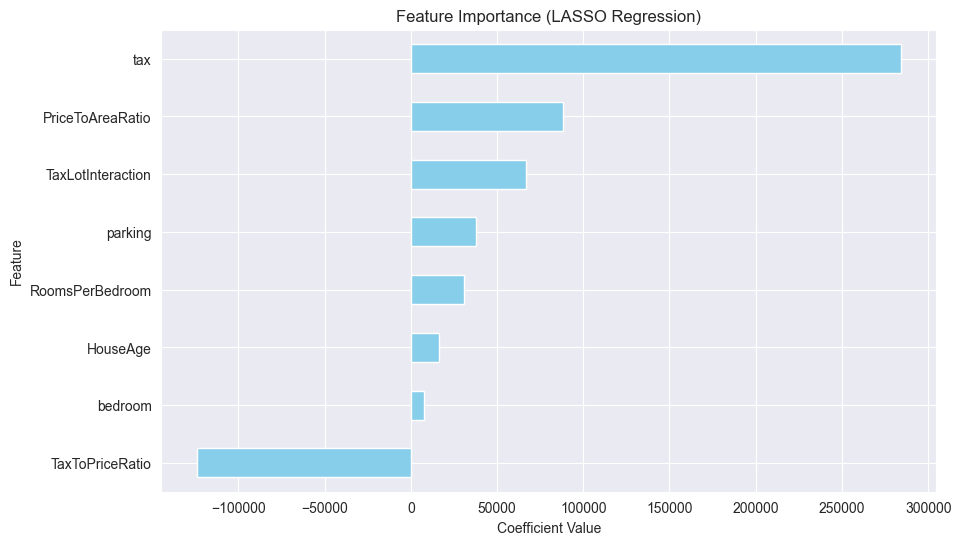

In [11]:
import matplotlib.pyplot as plt

# Feature Importance Analysis (LASSO)
lasso_model = Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=5000, random_state=42)
lasso_model.fit(scaler.fit_transform(X_reg), y_reg)
feature_importance = pd.Series(lasso_model.coef_, index=X_reg.columns)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance (LASSO Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

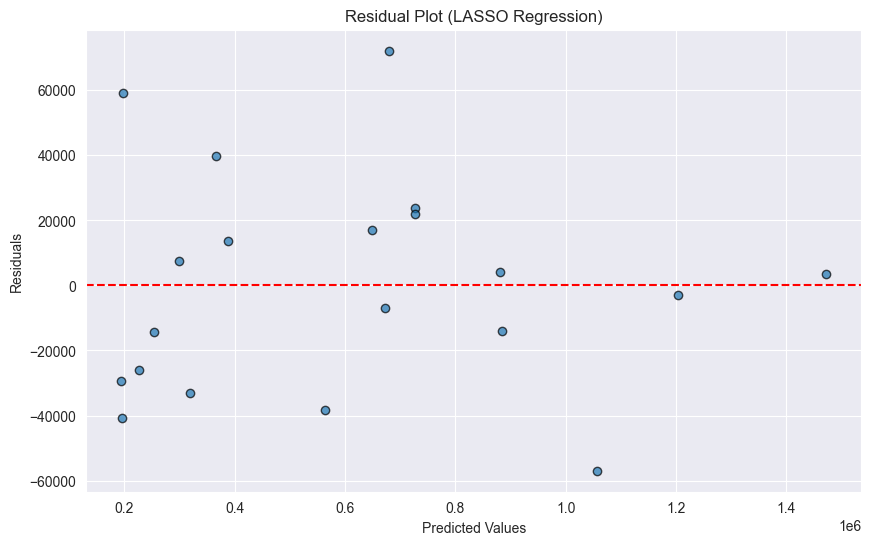

In [12]:
# Residual Visualization
X_reg_scaled = scaler.fit_transform(X_reg)

# Prediction of residuals using LASSO
y_pred_lasso = lasso_model.predict(X_reg_scaled)
residuals = y_reg - y_pred_lasso

# Visualization of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (LASSO Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [13]:
from sklearn.utils import resample

# Define classification target
filtered_data['sold_within_month'] = (
    pd.to_datetime(filtered_data['sold_date'], errors='coerce') -
    pd.to_datetime(filtered_data['date_list'], errors='coerce')
).dt.days <= 30

# Drop rows with invalid date calculations
classification_data = filtered_data.dropna(subset=['sold_within_month']).copy()

# Resample to balance the classes
majority_class = classification_data[classification_data['sold_within_month'] == False]
minority_class = classification_data[classification_data['sold_within_month'] == True]

minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
balanced_classification_data = pd.concat([majority_class, minority_upsampled])

In [14]:
# Prepare features and target for classification
X_class = balanced_classification_data[selected_features].drop(columns=['price_sold'])
y_class = balanced_classification_data['sold_within_month']

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

# Initialize StandardScaler and scale data
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)

# Initialize models
tree_model = DecisionTreeClassifier(random_state=42)
logistic_model = LogisticRegression(max_iter=5000, random_state=42)

# Evaluate Decision Tree
tree_scores = cross_val_score(tree_model, X_class, y_class, cv=5, scoring='accuracy')
tree_model.fit(X_class, y_class)
y_pred_tree = tree_model.predict(X_class)
tree_conf_matrix = confusion_matrix(y_class, y_pred_tree)
tree_class_report = classification_report(y_class, y_pred_tree)

# Evaluate Logistic Regression with scaled data
logistic_scores = cross_val_score(logistic_model, X_class_scaled, y_class, cv=5, scoring='accuracy')
logistic_model.fit(X_class_scaled, y_class)
y_pred_logistic = logistic_model.predict(X_class_scaled)
logistic_conf_matrix = confusion_matrix(y_class, y_pred_logistic)
logistic_class_report = classification_report(y_class, y_pred_logistic)

# Results
df_results = pd.DataFrame({
    "Model": ["Decision Tree", "Logistic Regression"],
    "Mean Accuracy": [tree_scores.mean(), logistic_scores.mean()]
})

df_results

,Model,Mean Accuracy
0,Decision Tree,0.860714
1,Logistic Regression,0.750000


In [16]:
# Display confusion matrices and classification reports
print("Decision Tree Confusion Matrix:")
tree_conf_matrix

Decision Tree Confusion Matrix:


array([[18,  0],
       [ 0, 18]])

In [17]:
print("Decision Tree Classification Report:")
print(tree_class_report)

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [18]:
print("Logistic Regression Confusion Matrix:")
logistic_conf_matrix

Logistic Regression Confusion Matrix:


array([[16,  2],
       [ 0, 18]])

In [19]:
print("Logistic Regression Classification Report:")
print(logistic_class_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.89      0.94        18
        True       0.90      1.00      0.95        18

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [20]:
# Hyperparameter Tuning for Decision Tree
param_grid_tree = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
tree_grid = GridSearchCV(tree_model, param_grid_tree, scoring='accuracy', cv=5)
tree_grid.fit(X_class, y_class)
best_tree_params = tree_grid.best_params_

# Hyperparameter Tuning for Logistic Regression
param_grid_logistic = {'C': [0.01, 0.1, 1, 10, 100]}
logistic_grid = GridSearchCV(logistic_model, param_grid_logistic, scoring='accuracy', cv=5)
logistic_grid.fit(X_class_scaled, y_class)
best_logistic_params = logistic_grid.best_params_

# Feature Importance for Decision Tree
tree_model_best = DecisionTreeClassifier(**best_tree_params, random_state=42)
tree_model_best.fit(X_class, y_class)
feature_importance_tree = pd.Series(tree_model_best.feature_importances_, index=X_class.columns)

tuning_results = pd.DataFrame({
    "Models": ["Decision Tree", "Logistic Regression"],
    "Best Parameters": [best_tree_params, best_logistic_params]
})

tuning_results

,Models,Best Parameters
0,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}"
1,Logistic Regression,{'C': 10}


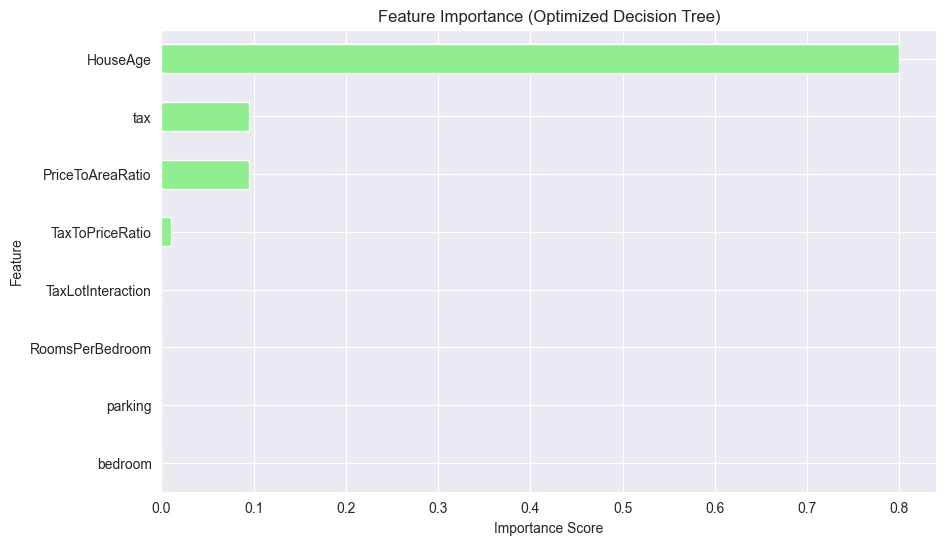

In [21]:
# Plot feature importance for Decision Tree
plt.figure(figsize=(10, 6))
feature_importance_tree.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Feature Importance (Optimized Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [22]:
# Evaluate tuned models with cross-validation
tree_model_optimized = DecisionTreeClassifier(**best_tree_params, random_state=42)
logistic_model_optimized = LogisticRegression(C=best_logistic_params['C'], max_iter=5000, random_state=42)

# Cross-validation scores for optimized models
tree_optimized_scores = cross_val_score(tree_model_optimized, X_class, y_class, cv=5, scoring='accuracy')
logistic_optimized_scores = cross_val_score(logistic_model_optimized, X_class_scaled, y_class, cv=5, scoring='accuracy')

# Fit optimized models for final predictions
tree_model_optimized.fit(X_class, y_class)
logistic_model_optimized.fit(X_class_scaled, y_class)

y_pred_tree_optimized = tree_model_optimized.predict(X_class)
y_pred_logistic_optimized = logistic_model_optimized.predict(X_class_scaled)

# Generate classification reports
tree_optimized_report = classification_report(y_class, y_pred_tree_optimized)
logistic_optimized_report = classification_report(y_class, y_pred_logistic_optimized)

# Confusion matrices
tree_optimized_conf_matrix = confusion_matrix(y_class, y_pred_tree_optimized)
logistic_optimized_conf_matrix = confusion_matrix(y_class, y_pred_logistic_optimized)

final_results = pd.DataFrame({
    "Models": ["Decision Tree", "Logistic Regression"],
    "Optimized Mean Accuracy": [tree_optimized_scores.mean(), logistic_optimized_scores.mean()]
})

final_results

,Models,Optimized Mean Accuracy
0,Decision Tree,0.860714
1,Logistic Regression,0.803571


In [23]:
# Display final classification reports
print("Optimized Decision Tree Classification Report:")
print(tree_optimized_report)

Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [24]:
print("Optimized Logistic Regression Classification Report:")
print(logistic_optimized_report)

Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.89      0.94        18
        True       0.90      1.00      0.95        18

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



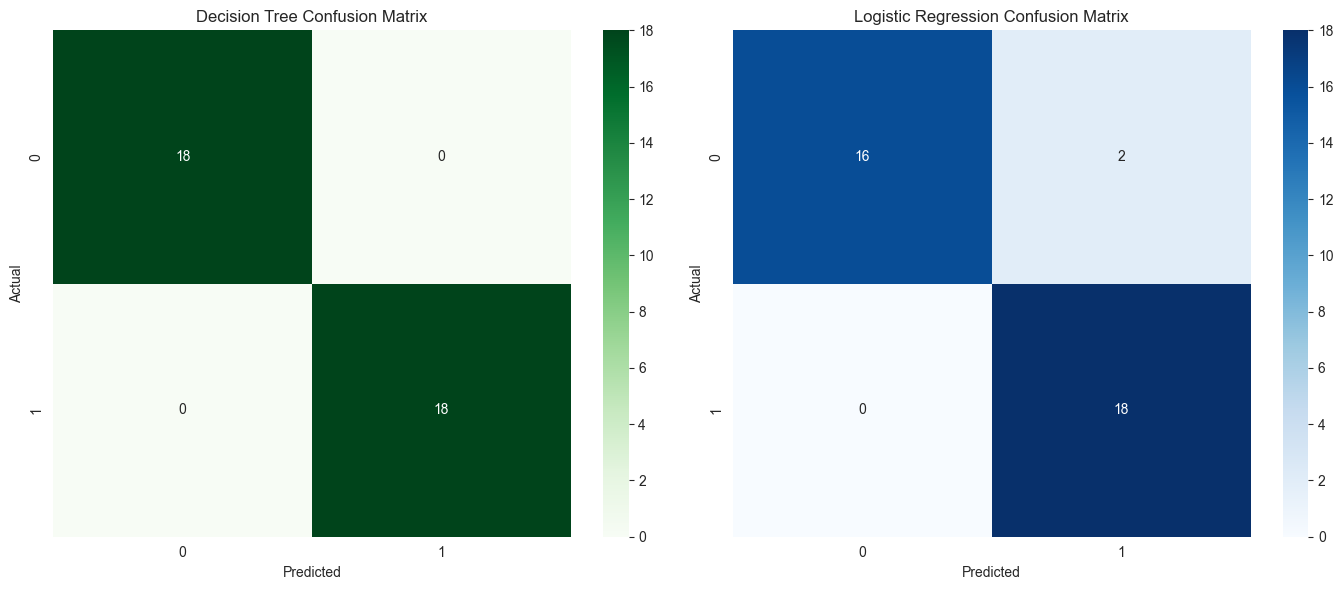

In [25]:
# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(tree_optimized_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(logistic_optimized_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()